In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the .csv file; encoding='latin-1' to enable reading the file without error
data = pd.read_csv('spotify-2023.csv',encoding='latin-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of Dataset

### How many rows and columns does the dataset contain?


The amount of rows in the dataset is 953, while the amount of columns is 24.

In [9]:
#Get the shape of data in order to find amount of rows and columns
data.shape

(953, 24)

### What are the data types? Are there any missing values?

The data types in the dataset consist of integers and objects. There are two data types with missing values: in_shazam_charts and key. The missing values in in_shazam_charts are 50, and the missing values in key are 95. The datatypes and missing values are presented by the code below:

In [13]:
#dtypes attribute displays the data types of the functions within the dataset
dataset_data_types = data.dtypes

#Find the missing values in each column then get the sum for each datatype
missing_values = data.isnull()
total_missing_values = missing_values.sum()

#Print the results
print('Dataset data types: \n', dataset_data_types)
print('\nDataset missing values: \n', total_missing_values) 

Dataset data types: 
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Dataset missing values: 
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_s

# Basic Descriptive Statistics


### What are the mean, median, and standard deviation of the streams column?

The mean of the streams column is 514137424.93907565, the median is 290530915.0, and standard deviation of the streams column is 566856949.0388832.

In [124]:
#Make it so that datatype values are only integers
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

#Individually get the values of each attribute: mean, median, and standard deviation.
mean_streams = data['streams'].mean()
median_streams = data['streams'].median()
std_streams = data['streams'].std()

#Print the results
print('\nMean of Streams: ', mean_streams)
print('Median of Streams: ', median_streams)
print('Standard Deviation of Streams: ', std_streams)


Mean of Streams:  514137424.93907565
Median of Streams:  290530915.0
Standard Deviation of Streams:  566856949.0388832


### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In terms of distribution of released_year, the tracks per year are generally in the single digit to double digit range, with the amount of tracks generally increasing the more recent the year. The outliers here are the years 2023, 2022, and 2021, as the amounts of tracks streamed in those years go past the hundreds. By the graph below, the noticeable trend is that the number of tracks played per released year increase as it approaches the present. In terms of distribution of artist_count, a majority of the streamed tracks are by a single artist, with the major outliers being the two tracks including 7 artists, and the 8 tracks including 8 artists.   

Distribution of released year:
 released_year
2023    175
2022    402
2021    119
2020     37
2019     36
2018     10
2017     23
2016     18
2015     11
2014     13
Name: count, dtype: int64

Distribution of arist count 
 artist_count
1    587
2    254
3     85
4     15
5      5
6      3
7      2
8      2
Name: count, dtype: int64


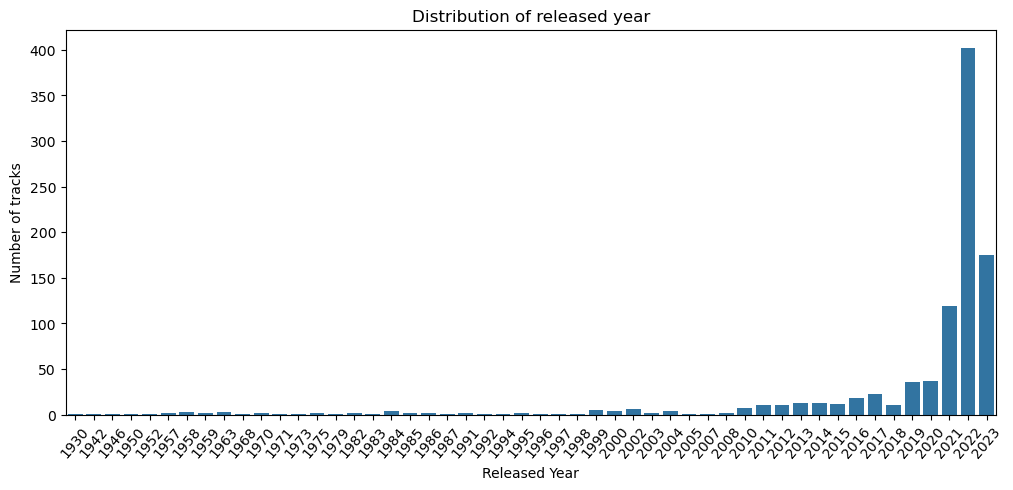

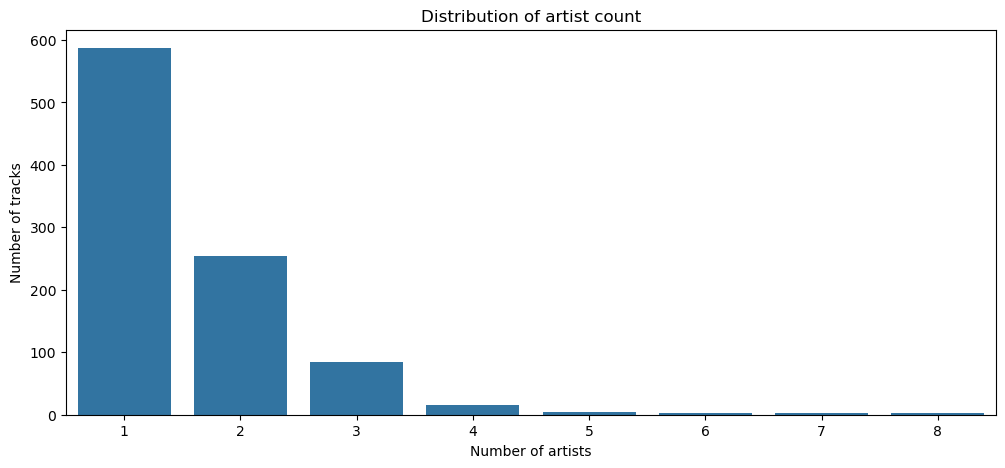

In [24]:
#Count the values of the datatypes by the amount of their appearances in the dataset
released_years_distribution = data['released_year'].value_counts().sort_index()
artist_count_distribution = data['artist_count'].value_counts().sort_index()

#Print the results
print('Distribution of released year:\n',released_years_distribution[::-1].head(10))
print('\nDistribution of arist count \n', artist_count_distribution)

#Create the bar graph for distribution of released year
plt.figure(figsize=(12, 5)) #Set the size of the visual
sns.barplot(x=released_years_distribution.index, y=released_years_distribution.values) #Assign the x and y variables
plt.xlabel('Released Year') #Name the x label of the graph
plt.ylabel('Number of tracks') #Name the y label of the graph
plt.title('Distribution of released year') #Name the title
plt.xticks(rotation=50) #Rotate the index of x by 50 degrees for more understandable visualization

#Create the bar graph for distribution of artist count
plt.figure(figsize=(12, 5)) #Set the size of the visual
sns.barplot(x=artist_count_distribution.index, y=artist_count_distribution.values) #Assign the x and y variables
plt.xlabel('Number of artists') #Name the x label of the graph
plt.ylabel('Number of tracks') #Name the y label of the graph
plt.title('Distribution of artist count') #Name the title

plt.show()

# Top Performers


### Which track has the highest number of streams? Display the top 5 most streamed tracks.

The track with the highest number of streams is "Blinding Lights" by The Weeknd, with 3,703,895,074 
streams. The four other tracks are displayed below:

In [28]:
#Sort data by streams; arrange it in a descending order
most_streamed_tracks = data.sort_values(by = 'streams', ascending=False)

#Display only the top 5 entries
most_streamed_tracks.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

The five most frequent artists are as shown:

In [34]:
#Count the values of the datatype by the amount of their appearances in the dataset
top_5_artists = data['artist(s)_name'].value_counts()

#Print the results, showing only the top 5 entries
print('Top 5 most frequent artists: \n', top_5_artists.head())

Top 5 most frequent artists: 
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


#  Temporal Trends


### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

The visual representation and values can be observed by the following code:

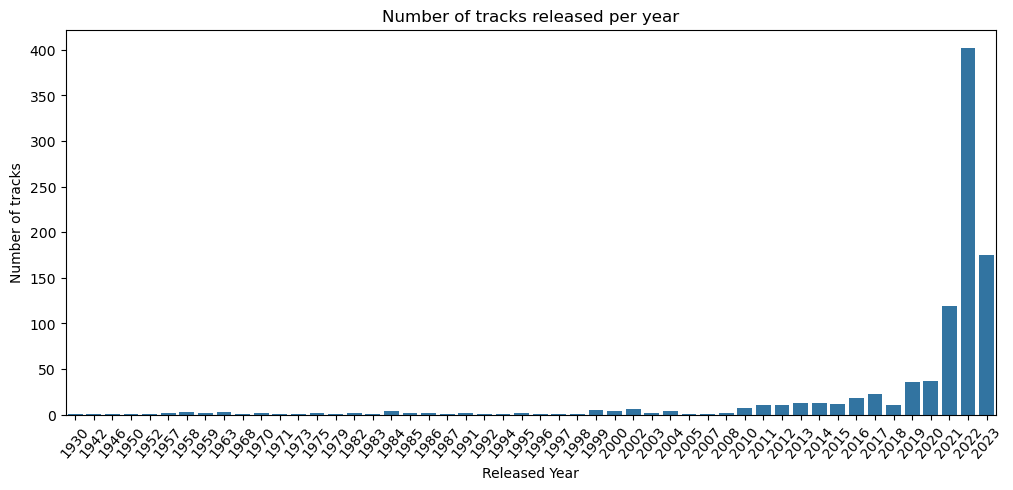

Tracks released per year released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


In [38]:
#Create the bar graph of the numbers of tracks released per year
plt.figure(figsize=(12, 5)) #Set the size of the visual

#Make use of the previously declared variable for the number of tracks released per year 
sns.barplot(x=released_years_distribution.index, y=released_years_distribution.values) #Assign the x and y variables
plt.xlabel('Released Year') #Name the x label of the graph
plt.ylabel('Number of tracks') #Name the y label of the graph
plt.title('Number of tracks released per year') #Name the title
plt.xticks(rotation=50) #Rotate the index of x by 50 degrees for more understandable visualization
plt.show() 

#Print the count of tracks released per year
print('Tracks released per year', released_years_distribution)

### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

The most number of tracks released are in the month of January. The noticeable pattern is that track releases peak in the first half of the year. 

Tracks released in common month
 released_month
1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64


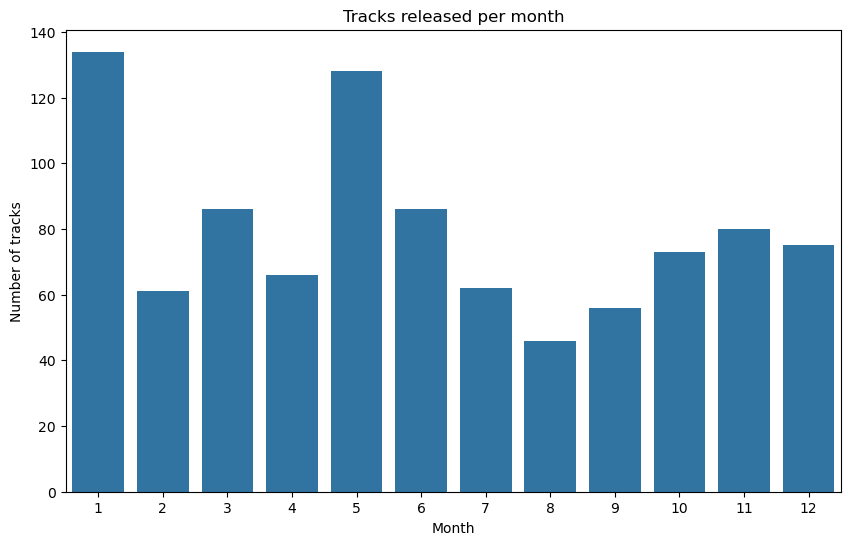

In [42]:
#Count the values of the datatype by the amount of their appearances in the dataset
tracks_per_month = data['released_month'].value_counts().sort_index()

#Print the values
common_month = data['released_month'].value_counts()
print('Tracks released in common month\n', common_month)

#Create the graph of the numbers of tracks released per month
plt.figure(figsize=(10, 6)) #Set the size of the visual
sns.barplot(x = tracks_per_month.index, y = tracks_per_month.values) #Assign the x and y variables 
plt.xlabel('Month') #Name the x label of the graph
plt.ylabel('Number of tracks') #Name the y label of the graph
plt.title('Tracks released per month') #Name the title
plt.show()

# Genre and Music Characteristics
# 

### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

Of the three attributes, they all have a negative correlation with streams. 

In [46]:
#Declare a variable with the needed data
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%']
attributes_list = data[attributes]

#Make it so that datatype values are only integers
attributes_list = attributes_list.apply(pd.to_numeric, errors='coerce')

#Find the correlation between data
attribute_correlation = attributes_list.corr()

#Drop streams; sort the correlation of the data
stream_correlation = attribute_correlation['streams'].drop('streams').sort_values(ascending=False)

#Print the result
print(stream_correlation)

bpm              -0.002438
energy_%         -0.026051
danceability_%   -0.105457
Name: streams, dtype: float64


### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Valence and acousticness has a negative correlation, but danceability and energy has a 0.1980948483762567 correlation.

In [128]:
#Declare a variable with the needed data
other_attributes = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
other_attributes_list = data[other_attributes]

#Find the correlation between data
other_attributes_correlation = other_attributes_list.corr()

#Locate the necessary values
danceability_energy_correlation = other_attributes_correlation.loc['danceability_%', 'energy_%']
valence_acousticness_correlation = other_attributes_correlation.loc['valence_%','acousticness_%']

#Print the results
print('Danceability and Energy Correlation: ', danceability_energy_correlation)
print('Valence and Acousticness Correlation: ', valence_acousticness_correlation)

Danceability and Energy Correlation:  0.1980948483762567
Valence and Acousticness Correlation:  -0.08190727483082776


# Platform Popularity


### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

As seen by the averages, Spotify is the far more popular platform in playlists when compared to Apple and Deezer.

Average amount of tracks per Spotify playlist: 
 5200.124868835257

Average amount of tracks per Apple playlist: 
 67.8121720881427

Average amount of tracks per Deezer playlist: 
 109.74027459954233


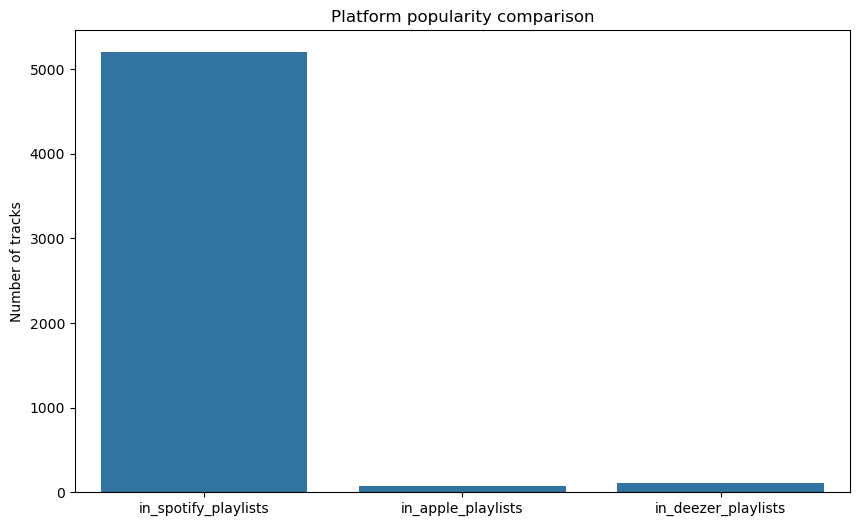

In [91]:
#Declare a variable with the needed data
playlist_data = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',]
total_playlists = data[playlist_data]

#Make it so that datatype values are only integers
average_playlists = total_playlists.apply(pd.to_numeric,errors='coerce').mean()

#Print the needed values
print('Average amount of tracks per Spotify playlist: \n', average_playlists['in_spotify_playlists'])
print('\nAverage amount of tracks per Apple playlist: \n', average_playlists['in_apple_playlists'])
print('\nAverage amount of tracks per Deezer playlist: \n', average_playlists['in_deezer_playlists'])

#Create the bar graph of the numbers of tracks released per year
plt.figure(figsize=(10, 6)) #Set the size of the visual
sns.barplot(average_playlists) #Assign the values for the graph
plt.ylabel('Number of tracks') #Name the y label of the graph
plt.title('Platform popularity comparison') #Name the title
plt.show()

# Advanced Analysis


### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

For the key, the most streamed tracks are those in the key of C#. Between major and minor, the more streamed tracks are major.

In [62]:
#Make it so that datatype values are only integers
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

#Group the data, and get the average
streams_key = data.groupby(['key'])[['streams']].mean()
streams_mode = data.groupby(['mode'])[['streams']].mean()

#Print the results
print(streams_key.reset_index(),'\n')
print(streams_mode.reset_index(),'\n')

   key       streams
0    A  4.088414e+08
1   A#  5.524754e+08
2    B  5.193480e+08
3   C#  6.042802e+08
4    D  5.295256e+08
5   D#  5.530365e+08
6    E  5.774972e+08
7    F  4.684464e+08
8   F#  5.223632e+08
9    G  4.525994e+08
10  G#  4.769119e+08 

    mode       streams
0  Major  5.348328e+08
1  Minor  4.859445e+08 



### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

Certain artists do consistently appear in more playlists and charts, as proven by the obtained values below displaying the artists with the most appearances across all platforms.

In [85]:
#Declare a variable with the needed data
playlists_and_charts = [
    'in_spotify_playlists', 'in_spotify_charts', 
    'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 
    'in_shazam_charts'
]

#Make it so that datatype values are only integers
data[playlists_and_charts] = data[playlists_and_charts].apply(pd.to_numeric, errors='coerce')

#Add all of the data
data['total_appearances'] = data[playlists_and_charts].sum(axis=1)

#Group the artists by the previously declared sum of all appearances
artist_appearances = data.groupby('artist(s)_name')['total_appearances'].sum()

#Sort the values obtained
top_artists = artist_appearances.sort_values(ascending=False).head()

#Print the results
print('Top 5 artists by appearances:', top_artists)

Top 5 artists by appearances: artist(s)_name
The Weeknd      150273.0
Taylor Swift    140755.0
Ed Sheeran      133407.0
Harry Styles    115338.0
Eminem           88523.0
Name: total_appearances, dtype: float64
